# Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import talib
import numpy as np
from scipy.stats import f_oneway
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,ReLU
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


# Importing the dataset

In [2]:
df=pd.read_csv("SPY1.csv")

# SMA

(5035,)


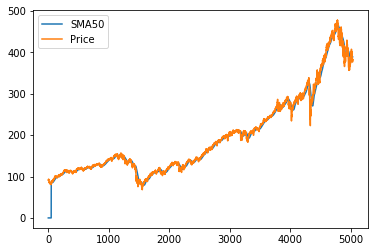

In [3]:
sma50= talib.SMA(df['Close'].values, 50)
print(sma50.shape)
sma_50_list=[]
sma50[np.isnan(sma50)] = 0
plt.plot(sma50,label='SMA50')
plt.plot(df['Close'].values,label='Price')
plt.legend(loc='best')

In [4]:
for sma in range (0,len(sma50)-1,1):
    if sma50[sma]<sma50[sma+1]:
        #sma50[sma] = 1
        sma_50_list.append(1)
    else:
        #sma50[sma] = 0
        sma_50_list.append(0)

In [5]:
df.insert(loc=10, column='SMA', value=pd.Series(sma_50_list))

# RSI

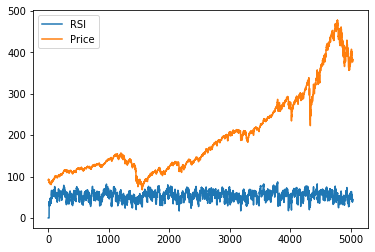

In [6]:
rsi200= talib.RSI(df['Close'].values)
rsi200_list=[]
rsi200[np.isnan(rsi200)] = 0
plt.plot(rsi200,label='RSI')
plt.plot(df['Close'].values,label='Price')
plt.legend(loc='best')

In [7]:
for rsi in range (0,len(rsi200)-1,1):
    
    if rsi200[rsi]<rsi200[rsi+1]:
        #sma50[sma] = 1
        rsi200[rsi]
        rsi200_list.append(1)
    else:
        #sma50[sma] = 0
        rsi200_list.append(0)

In [8]:
df.insert(loc=11, column='RSI', value=pd.Series(rsi200_list))

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Inflation,EUR/USD,Gold Price,SMA,RSI,Brent Oil Prices
0,1/2/2003,88.849998,91.300003,88.540001,91.070000,62.047668,44516300,1.64,1.03660,346.50,0.0,0.0,30.32
1,1/3/2003,90.910004,91.379997,90.500000,91.349998,62.238476,32222600,1.62,1.04280,351.60,0.0,0.0,31.43
2,1/6/2003,91.239998,93.489998,91.169998,92.959999,63.335392,40984500,1.62,1.04470,352.10,0.0,0.0,31.43
3,1/7/2003,92.900002,93.370003,92.199997,92.730003,63.178707,38640400,1.63,1.04050,347.70,0.0,0.0,30.78
4,1/8/2003,92.199997,92.400002,91.050003,91.389999,62.265690,38702200,1.62,1.05010,354.30,0.0,0.0,29.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,12/23/2022,379.649994,383.059998,378.029999,382.910004,382.910004,59857300,2.20,1.06150,1798.90,1.0,0.0,79.58
5031,12/27/2022,382.790009,383.149994,379.649994,381.399994,381.399994,51638200,2.26,1.06335,1805.55,1.0,0.0,82.45
5032,12/28/2022,381.329987,383.390015,376.420013,376.660004,376.660004,70911500,2.28,1.06115,1808.00,1.0,1.0,81.70
5033,12/29/2022,379.630005,384.350006,379.079987,383.440002,383.440002,66970900,2.27,1.06603,1804.20,1.0,0.0,80.96


In [10]:
df=df.dropna()

# Introducing the columns

In [11]:
column_list=['Open','High','Low','Close','Adj Close','Volume','Inflation','EUR/USD','SMA','RSI','Gold Price','Brent Oil Prices']
input_column=['Open','High','Inflation','EUR/USD','SMA','RSI','Gold Price','Brent Oil Prices']
target_column=['Close']

In [12]:
input_column

['Open',
 'High',
 'Inflation',
 'EUR/USD',
 'SMA',
 'RSI',
 'Gold Price',
 'Brent Oil Prices']

In [13]:
target_column

['Close']

In [14]:
df_input=df[input_column]
df_target=df[target_column]

In [15]:
scaler=MinMaxScaler()
input_column_scaler=scaler.fit_transform(df_input)
target_column_scaler=scaler.fit_transform(df_target)

In [16]:
print(input_column_scaler)
print(target_column_scaler)

[[0.0508182  0.05195376 0.53691275 ... 0.         0.01390797 0.15723504]
 [0.05582709 0.05214888 0.53020134 ... 0.         0.01682692 0.16546763]
 [0.05662947 0.05729547 0.53020134 ... 0.         0.0171131  0.16546763]
 ...
 [0.76553118 0.76381771 0.74496644 ... 0.         0.84898695 0.54387006]
 [0.76198115 0.76440316 0.75167785 ... 1.         0.85038919 0.5383075 ]
 [0.75784765 0.76674471 0.74832215 ... 0.         0.84821429 0.53281911]]
[[0.05605469]
 [0.05673828]
 [0.06066894]
 ...
 [0.76486817]
 [0.75329592]
 [0.76984865]]


In [17]:
TimeseriesGenerator(input_column_scaler,target_column_scaler,length=50,sampling_rate=1,batch_size=1)

In [18]:
train_data,test_data,train_target,test_target=train_test_split(input_column_scaler,target_column_scaler,test_size=0.2,random_state=123,shuffle=False)

In [19]:
print(train_data.shape)
print(test_data.shape)

(4027, 8)
(1007, 8)


In [65]:
days_input=7
#batch_size=32
num_input_features=8

train_generator=TimeseriesGenerator(train_data,train_target,length=days_input,sampling_rate=1)#,batch_size=batch_size
test_generator=TimeseriesGenerator(test_data,test_target,length=days_input,sampling_rate=1)#,batch_size=batch_size

In [85]:
model = Sequential()

model.add(LSTM(units=160, return_sequences=True, input_shape=(days_input, num_input_features)))
model.add(LeakyReLU(0.001))
model.add(Dropout(0.2))
model.add(LSTM(units=160, return_sequences=True))
model.add(LeakyReLU(0.001))
model.add(Dropout(0.2))
model.add(LSTM(units=160, return_sequences=True))
model.add(LeakyReLU(0.001))
model.add(Dropout(0.2))

model.add(LSTM(units=160, return_sequences=False))

model.add(Dense(units=1,activation='linear'))
optimizer = Adam()#learning_rate=0.0001
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])


In [86]:
 early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)

In [87]:
history=model.fit(train_generator,epochs=150,validation_data=test_generator,shuffle=False,callbacks=[early_stopping_callback])#

Epoch 1/150
32/32 [==============================] - 5s 142ms/step - loss: 0.0085 - mae: 0.0738 - val_loss: 0.0884 - val_mae: 0.2308
Epoch 2/150
32/32 [==============================] - 3s 106ms/step - loss: 0.0153 - mae: 0.0964 - val_loss: 0.0790 - val_mae: 0.2212
Epoch 3/150
32/32 [==============================] - 5s 153ms/step - loss: 0.0161 - mae: 0.1009 - val_loss: 0.0765 - val_mae: 0.2201
Epoch 4/150
32/32 [==============================] - 5s 157ms/step - loss: 0.0214 - mae: 0.1199 - val_loss: 0.0508 - val_mae: 0.1689
Epoch 5/150
32/32 [==============================] - 5s 160ms/step - loss: 0.0349 - mae: 0.1500 - val_loss: 0.2858 - val_mae: 0.4641
Epoch 6/150
32/32 [==============================] - 6s 173ms/step - loss: 0.0258 - mae: 0.1305 - val_loss: 0.2460 - val_mae: 0.4399
Epoch 7/150
32/32 [==============================] - 5s 167ms/step - loss: 0.0235 - mae: 0.1331 - val_loss: 0.1879 - val_mae: 0.3809
Epoch 8/150
32/32 [==============================] - 5s 170ms/step - 

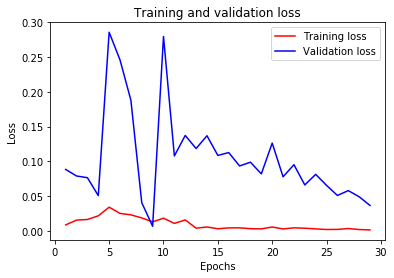

In [89]:
import matplotlib.pyplot as plt


# Plot the training and validation loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, c='r', label='Training loss')
plt.plot(epochs, val_loss, c='b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [90]:
# Generate predictions for the test data
y_pred = model.predict(test_generator)

# Flatten the predicted and true values
y_pred_flat = y_pred.flatten()
y_true_flat = test_target.flatten()

print('Length of predicted values:', len(y_pred_flat))
print('Length of true values:', len(y_true_flat))

Length of predicted values: 1000
Length of true values: 1007


In [91]:
# Generate predictions for the test data
y_pred = model.predict(test_generator)

# Flatten the predicted and true values
y_pred_flat = y_pred.flatten()
y_true_flat = test_target[days_input:].flatten()  # adjust the length of the true values

# Calculate the R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_true_flat, y_pred_flat)

print('R2 score:', r2)


R2 score: 0.31949887275608224


In [42]:
#model.save('SPY_ Close_Multivariate_91.h5')

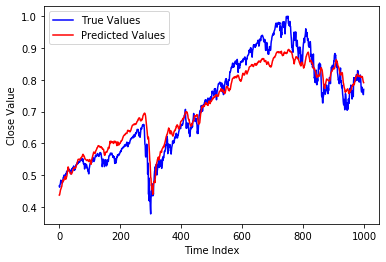

In [43]:
# Generate x-axis values for the predicted values
test_x_range = np.arange(len(y_true_flat))

# Plot the predicted and true values
plt.plot(test_x_range, y_true_flat, 'b', label='True Values')
plt.plot(test_x_range, y_pred_flat, 'r', label='Predicted Values')

# Add labels and legend
plt.xlabel('Time Index')
plt.ylabel('Close Value')
plt.legend()

# Show the plot
plt.show()